Importing libraries

In [193]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

installing dataset from UCI

In [194]:
pip install ucimlrepo

In [195]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata)

# variable information
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables)


{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

Dataset

Retrieving information from the dataset and checking the data

In [196]:
from ucimlrepo import fetch_ucirepo

In [197]:
obesity =fetch_ucirepo(id=544)

In [198]:
X=obesity.data.features
Y=obesity.data.targets

In [199]:
df=pd.concat([X,y],axis=1)

In [200]:
print("\nFirst rows of data:")
print(df.head())


First rows of data:
   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_T

In [201]:
print("\nColumn names (Features + Target):")
print(df.columns.tolist())


Column names (Features + Target):
['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']


In [202]:
print("\n Data types:")
print(df.dtypes)


 Data types:
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [203]:
print("\n numeric columns:")
print(df.describe())


 numeric columns:
               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000 

In [204]:
print("\n Missing values in each column:")
missing = df.isnull().sum()
print(missing)


 Missing values in each column:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


Checking how to turn categorical data into numerical data

In [205]:
target_col = 'NObeyesdad'
print(f"\n Target variable ({target_col}) - Unique values:")
print(df[target_col].unique())


 Target variable (NObeyesdad) - Unique values:
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [206]:
print(f"\n How many samples in each obesity class:")
print(df[target_col].value_counts().sort_values(ascending=False))


 How many samples in each obesity class:
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


Data Preprocessing: converrting all the values to numerical values

In [207]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)

['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


In [208]:
label_encoders = {}

In [209]:
for col in categorical_cols:
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])
    label_encoders[col] = le

In [210]:
target_col = 'NObeyesdad'
y_encoded = df_processed[target_col]
X_encoded = df_processed.drop(target_col, axis=1)

print(f"\n Features and target separated!")
print(f"  X_encoded shape: {X_encoded.shape}")
print(f"  y_encoded shape: {y_encoded.shape}")



 Features and target separated!
  X_encoded shape: (2111, 16)
  y_encoded shape: (2111,)


In [211]:
y = df[target_col]

In [212]:
X = df.drop(target_col, axis=1)

Training&Testing split of data to train the model and then test the same

In [213]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y_encoded,
    test_size=0.2,
    random_state=42
)

In [214]:
print(f"Total samples: {len(X_encoded)}")
print(f"\nTraining set:")
print(f"  X_train shape: {X_train.shape}")
print(f"  y_train shape: {y_train.shape}")

print(f"\nTest set:")
print(f"  X_test shape: {X_test.shape}")
print(f"  y_test shape: {y_test.shape}")

print(f"\nRatio check:")
print(f"  Training: {len(X_train) / len(X_encoded) * 100:.1f}%")
print(f"  Testing: {len(X_test) / len(X_encoded) * 100:.1f}%")

Total samples: 2111

Training set:
  X_train shape: (1688, 16)
  y_train shape: (1688,)

Test set:
  X_test shape: (423, 16)
  y_test shape: (423,)

Ratio check:
  Training: 80.0%
  Testing: 20.0%


Trainign the model

In [215]:
model = LinearRegression()
print(f"Model type: {type(model)}")
print(f"Model object: {model}")

Model type: <class 'sklearn.linear_model._base.LinearRegression'>
Model object: LinearRegression()


retrying to turn categorical columns into numerical ones

In [216]:
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

Categorical columns: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [217]:
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()


    le.fit(X_train[col])
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

    label_encoders[col] = le
    print(f"{col} encoded")

Gender encoded
family_history_with_overweight encoded
FAVC encoded
CAEC encoded
SMOKE encoded
SCC encoded
CALC encoded
MTRANS encoded


In [218]:
X_train = X_train.values
X_test = X_test.values

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (1688, 16)
X_test shape: (423, 16)


In [219]:
target_encoder = LabelEncoder()


target_encoder.fit(y_train)
y_train_encoded = target_encoder.transform(y_train)
y_test_encoded = target_encoder.transform(y_test)

print(f"Mapping:")
for i, class_name in enumerate(target_encoder.classes_):
    print(f"  {class_name:30s} → {i}")

print(f"\ny_train encoded shape: {y_train_encoded.shape}")
print(f"y_test encoded shape: {y_test_encoded.shape}")

Mapping:
  Insufficient_Weight            → 0
  Normal_Weight                  → 1
  Obesity_Type_I                 → 2
  Obesity_Type_II                → 3
  Obesity_Type_III               → 4
  Overweight_Level_I             → 5
  Overweight_Level_II            → 6

y_train encoded shape: (1688,)
y_test encoded shape: (423,)


In [220]:

model.fit(X_train, y_train_encoded)
print(f"Bias (intercept): {model.intercept_:.4f}")
print(f"Number of weights learned: {len(model.coef_)}")

Bias (intercept): 2.9497
Number of weights learned: 16


Making predictions

In [221]:
y_train_pred = model.predict(X_train)

# Predicting on test data
y_test_pred = model.predict(X_test)
print(f"\nTraining predictions shape: {y_train_pred.shape}")
print(f"Test predictions shape: {y_test_pred.shape}")


Training predictions shape: (1688,)
Test predictions shape: (423,)


In [222]:
print(f"\nFirst 10 test predictions:")
print(y_test_pred[:10])

print(f"\nFirst 10 actual test values:")
print(y_test_encoded[:10])


First 10 test predictions:
[0.86954598 4.12319599 1.85038903 1.10466666 3.4756441  2.29969888
 4.04004299 3.38893512 3.50916538 1.57279752]

First 10 actual test values:
[0 4 0 0 1 0 3 5 2 0]


Performance Evaluation

In [223]:
train_mse = mean_squared_error(y_train_encoded, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train_encoded, y_train_pred)
train_r2 = r2_score(y_train_encoded, y_train_pred)


In [224]:
test_mse = mean_squared_error(y_test_encoded, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test_encoded, y_test_pred)
test_r2 = r2_score(y_test_encoded, y_test_pred)


In [225]:
print("\nTRAINING SET METRICS:")
print(f"  Mean Squared Error (MSE):     {train_mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {train_rmse:.4f}")
print(f"  Mean Absolute Error (MAE):    {train_mae:.4f}")
print(f"  R² Score:                     {train_r2:.4f}")

print("\n TEST SET METRICS:")
print(f"  Mean Squared Error (MSE):     {test_mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {test_rmse:.4f}")
print(f"  Mean Absolute Error (MAE):    {test_mae:.4f}")
print(f"  R² Score:                     {test_r2:.4f}")



TRAINING SET METRICS:
  Mean Squared Error (MSE):     2.7225
  Root Mean Squared Error (RMSE): 1.6500
  Mean Absolute Error (MAE):    1.3726
  R² Score:                     0.2897

 TEST SET METRICS:
  Mean Squared Error (MSE):     2.7232
  Root Mean Squared Error (RMSE): 1.6502
  Mean Absolute Error (MAE):    1.3831
  R² Score:                     0.2626


The accuracy is low, so trying to scale the model to increase accuracy

In [226]:
scaler = StandardScaler()

In [227]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train_scaled shape: (1688, 16)
X_test_scaled shape: (423, 16)


In [230]:
model = LinearRegression()

# Train on SCALED data
model.fit(X_train_scaled, y_train_encoded)



LinearRegression()

In [231]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

re-evaluating performance after scaling

In [232]:

# Training metrics
train_mse = mean_squared_error(y_train_encoded, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train_encoded, y_train_pred)
train_r2 = r2_score(y_train_encoded, y_train_pred)

# Test metrics
test_mse = mean_squared_error(y_test_encoded, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test_encoded, y_test_pred)
test_r2 = r2_score(y_test_encoded, y_test_pred)

print("\nTRAINING SET METRICS:")
print(f"  Mean Squared Error (MSE):     {train_mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {train_rmse:.4f}")
print(f"  Mean Absolute Error (MAE):    {train_mae:.4f}")
print(f"  R² Score:                     {train_r2:.4f}")

print("\nTEST SET METRICS:")
print(f"  Mean Squared Error (MSE):     {test_mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {test_rmse:.4f}")
print(f"  Mean Absolute Error (MAE):    {test_mae:.4f}")
print(f"  R² Score:                     {test_r2:.4f}")


TRAINING SET METRICS:
  Mean Squared Error (MSE):     2.7225
  Root Mean Squared Error (RMSE): 1.6500
  Mean Absolute Error (MAE):    1.3726
  R² Score:                     0.2897

TEST SET METRICS:
  Mean Squared Error (MSE):     2.7232
  Root Mean Squared Error (RMSE): 1.6502
  Mean Absolute Error (MAE):    1.3831
  R² Score:                     0.2626


In [233]:
if test_r2 > 0.2626:
    print(" Scaling improved the model!")
else:
    print(" Scaling didn't help much")

 Scaling improved the model!


Visualizations~

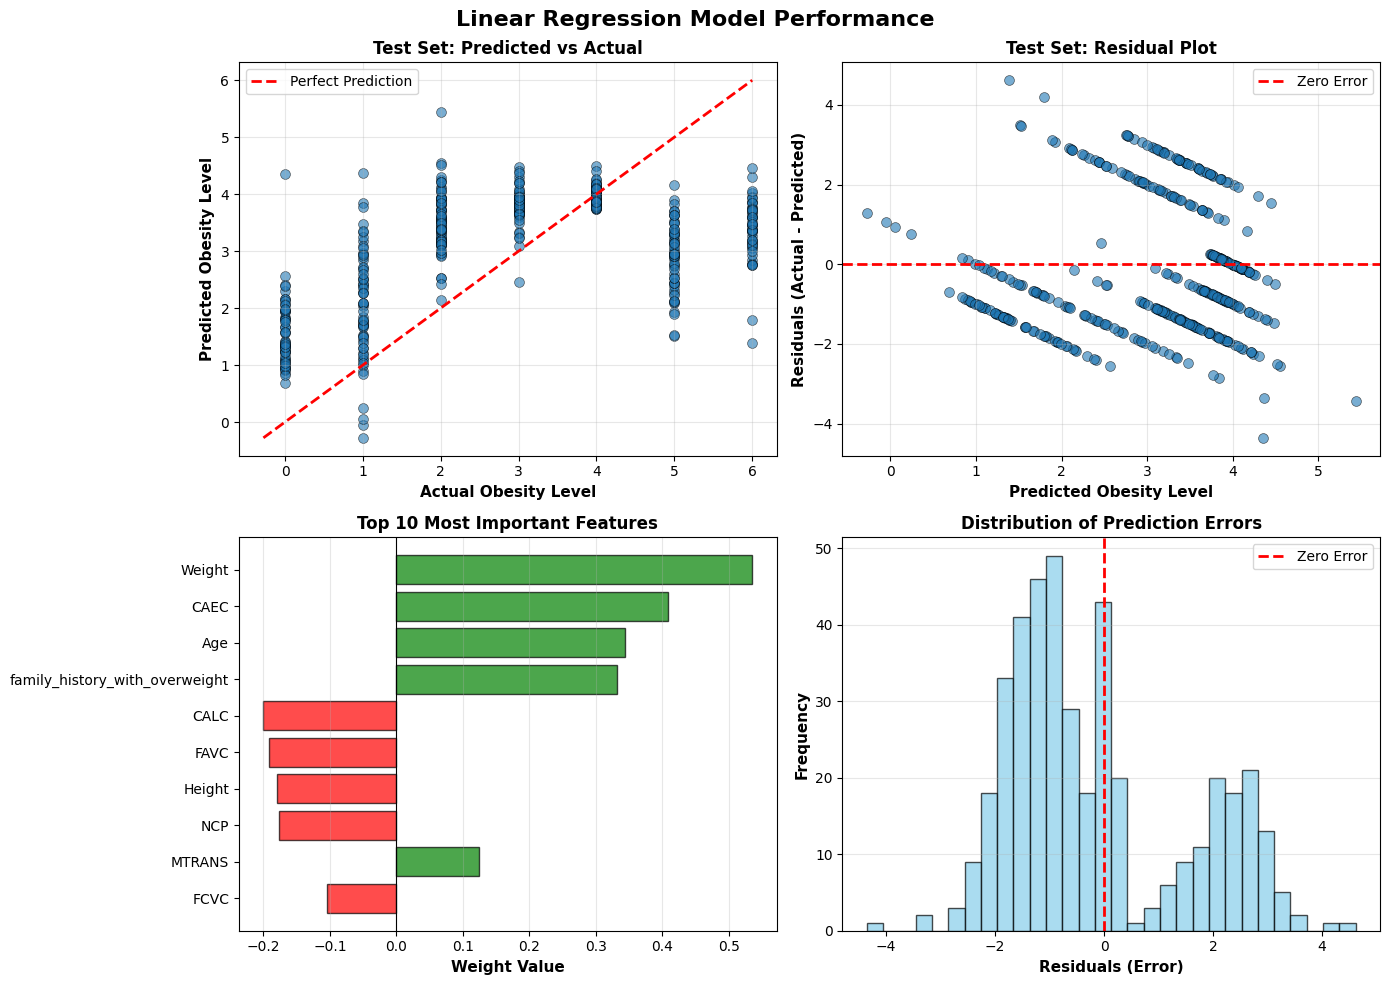

 Visualizations created!
 Saved as 'linear_regression_analysis.png'


In [234]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Linear Regression Model Performance', fontsize=16, fontweight='bold')

axes[0, 0].scatter(y_test_encoded, y_test_pred, alpha=0.6, s=50, edgecolors='k', linewidth=0.5)

# Add diagonal line (perfect prediction)
min_val = min(y_test_encoded.min(), y_test_pred.min())
max_val = max(y_test_encoded.max(), y_test_pred.max())
axes[0, 0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')

axes[0, 0].set_xlabel('Actual Obesity Level', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Predicted Obesity Level', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Test Set: Predicted vs Actual', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

residuals = y_test_encoded - y_test_pred

axes[0, 1].scatter(y_test_pred, residuals, alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2, label='Zero Error')

axes[0, 1].set_xlabel('Predicted Obesity Level', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Residuals (Actual - Predicted)', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Test Set: Residual Plot', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Weight': model.coef_
})

# Sort by absolute weight
feature_importance['Absolute_Weight'] = abs(feature_importance['Weight'])
feature_importance = feature_importance.sort_values('Absolute_Weight', ascending=True)

# Get last 10 (most important)
top_features = feature_importance.tail(10)

# Color: positive = green, negative = red
colors = ['green' if x > 0 else 'red' for x in top_features['Weight']]

axes[1, 0].barh(range(len(top_features)), top_features['Weight'], color=colors, alpha=0.7, edgecolor='black')
axes[1, 0].set_yticks(range(len(top_features)))
axes[1, 0].set_yticklabels(top_features['Feature'])
axes[1, 0].set_xlabel('Weight Value', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Top 10 Most Important Features', fontsize=12, fontweight='bold')
axes[1, 0].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[1, 0].grid(alpha=0.3, axis='x')


axes[1, 1].hist(residuals, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[1, 1].set_xlabel('Residuals (Error)', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Distribution of Prediction Errors', fontsize=12, fontweight='bold')
axes[1, 1].axvline(x=0, color='r', linestyle='--', linewidth=2, label='Zero Error')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('linear_regression_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Visualizations created!")
print(" Saved as 'linear_regression_analysis.png'")


DONE!